# 1. Generate Images

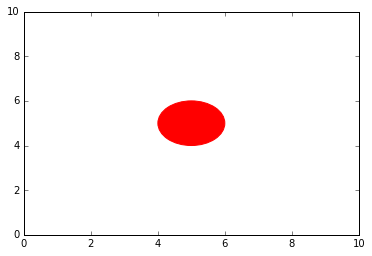

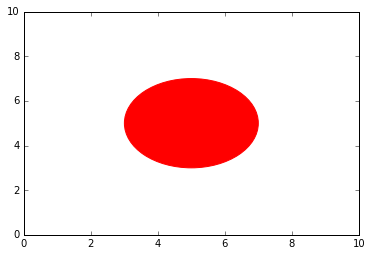

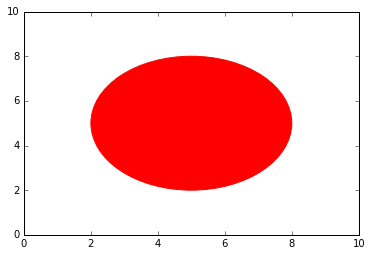

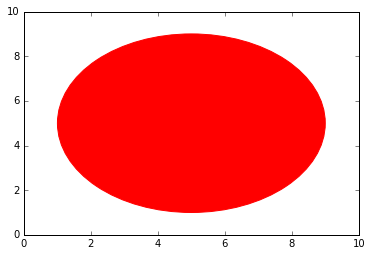

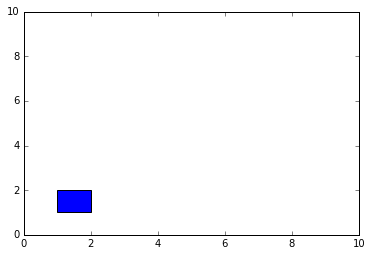

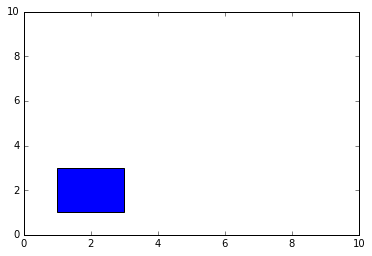

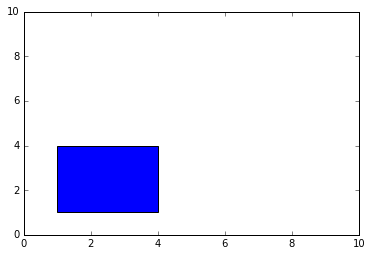

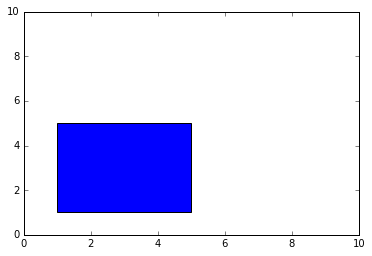

In [17]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

size = 10
for i in range(1,size/2):
    circle = plt.Circle((size/2, size/2), i, color='r')
    fig, ax = plt.subplots()
    ax.add_artist(circle)
    ax.set_xlim((0, size))
    ax.set_ylim((0, size))
    fig.savefig('images/circle{}.jpg'.format(str(i)))
    
for i in range(1,size/2):
    fig, ax1 = plt.subplots()
    ax1.add_patch(patches.Rectangle(
            (size/10, size/10),   # (x,y): left bot
            i * size/10,          # width
            i * size/10,          # height
        )
    )
    ax1.set_xlim((0, size))
    ax1.set_ylim((0, size))
    fig.savefig('images/rect{}.jpg'.format(str(i)), dpi=90, bbox_inches='tight')

# 2. Turn Images Into CSV

In [35]:
import sys
PATH_opencv = '/usr/local/Cellar/opencv/2.4.13/lib/python2.7/site-packages/'
sys.path.append(PATH_opencv)
import cv2
import os
import pandas as pd

In [40]:
directory = 'images'
size_standard = 100
data = []

for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        # 1. get image pixels
        img_raw = cv2.imread('{0}/{1}'.format(directory, filename), 0)
        img = cv2.resize(img_raw, (size_standard, size_standard)) 
        x = img.flatten().tolist()
        # 2. get label 
        y = filename.strip('.jpg')[:-1]
        
        x.insert(0, y)
        data.append(x)
        
df = pd.DataFrame(data)
print df.shape

(8, 10001)


In [45]:
df.to_csv('data.csv', index=False, header=False)

# TODO: neural network